# Data Science Assignment: Bitcoin Market Sentiment and Trader Activity Analysis

This notebook contains the analysis of Bitcoin market sentiment and trader activity based on the provided datasets, addressing the requirements outlined in the assignment instructions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Create folders for assignment structure
import os

# Download datasets
!pip install gdown
import gdown

# Bitcoin Market Sentiment Dataset
gdown.download("https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf",
               "csv_files/fear_greed.csv",
               quiet=False)

# Historical Trader Data
gdown.download("https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs",
               "csv_files/trader_data.csv",
               quiet=False)


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: c:\Users\Lokesh\Downloads\ds_LokeshMeshram\content\ds_LokeshMeshram\csv_files\fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 681kB/s]
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: c:\Users\Lokesh\Downloads\ds_LokeshMeshram\content\ds_LokeshMeshram\csv_files\trader_data.csv
100%|██████████| 47.5M/47.5M [00:12<00:00, 3.91MB/s]


'csv_files/trader_data.csv'

## 1. Data Loading and Cleaning

Loading the datasets and performing initial cleaning steps.

In [5]:
# Load the datasets
market_sentiment = pd.read_csv("csv_files/fear_greed.csv")
trader_data = pd.read_csv("csv_files/trader_data.csv")

In [6]:
# Clean and preprocess market_sentiment dataset
market_sentiment['date'] = pd.to_datetime(market_sentiment['date'])
market_sentiment = market_sentiment.dropna()  # Drop rows with any missing values

print("Cleaned Market Sentiment Data:")
market_sentiment.info()
display(market_sentiment.head())

Cleaned Market Sentiment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
# Clean and preprocess trader_data dataset
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data = trader_data.dropna() # Drop rows with any missing values

print("\nCleaned Trader Data:")
trader_data.info()
display(trader_data.head())


Cleaned Trader Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  fl

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 2. Exploratory Data Analysis (EDA)

Analyzing the individual datasets to understand their characteristics.

### Market Sentiment Analysis

Analyzing the `market_sentiment` dataset.

In [8]:
# Calculate and display descriptive statistics for the 'value' column
print("Descriptive Statistics for Market Sentiment Value:")
display(market_sentiment['value'].describe())

Descriptive Statistics for Market Sentiment Value:


count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64

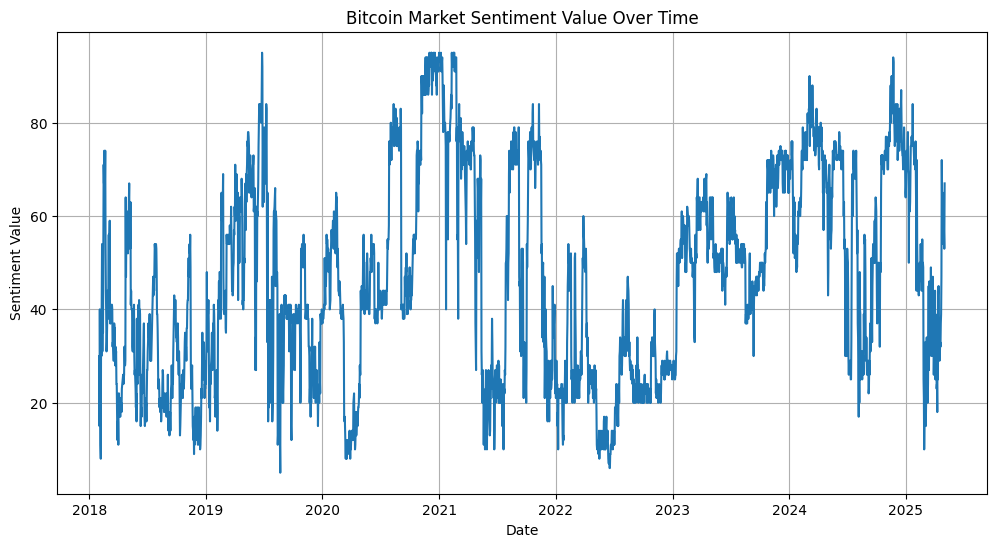

In [10]:
# Plot the 'value' over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=market_sentiment, x='date', y='value')
plt.title('Bitcoin Market Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.grid(True)
plt.savefig('outputs/sentiment_value_over_time.png')
plt.show()

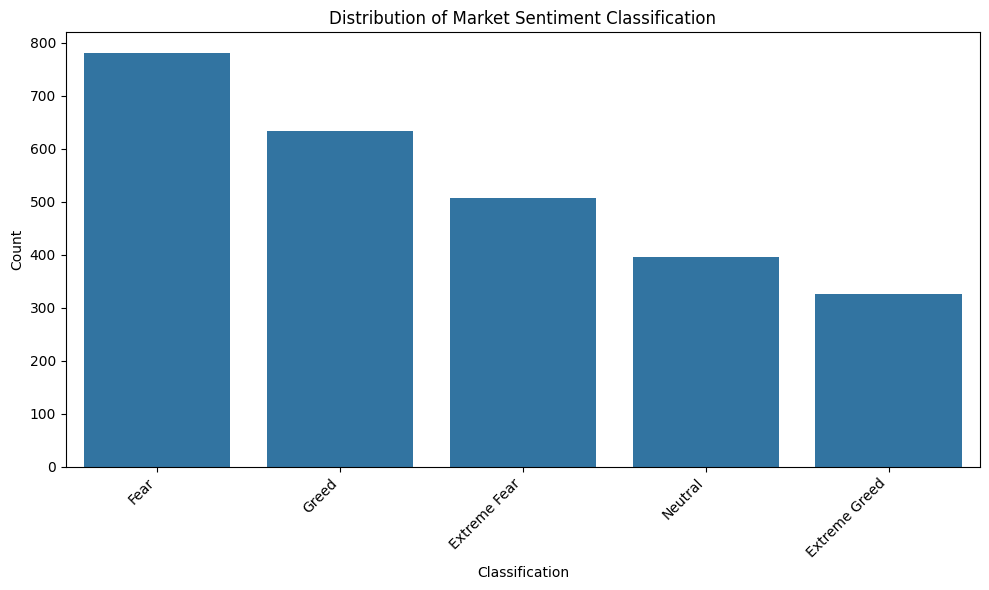

In [11]:
# Create a count plot for sentiment classification categories
plt.figure(figsize=(10, 6))
sns.countplot(data=market_sentiment, x='classification', order=market_sentiment['classification'].value_counts().index)
plt.title('Distribution of Market Sentiment Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/sentiment_classification_distribution.png')
plt.show()

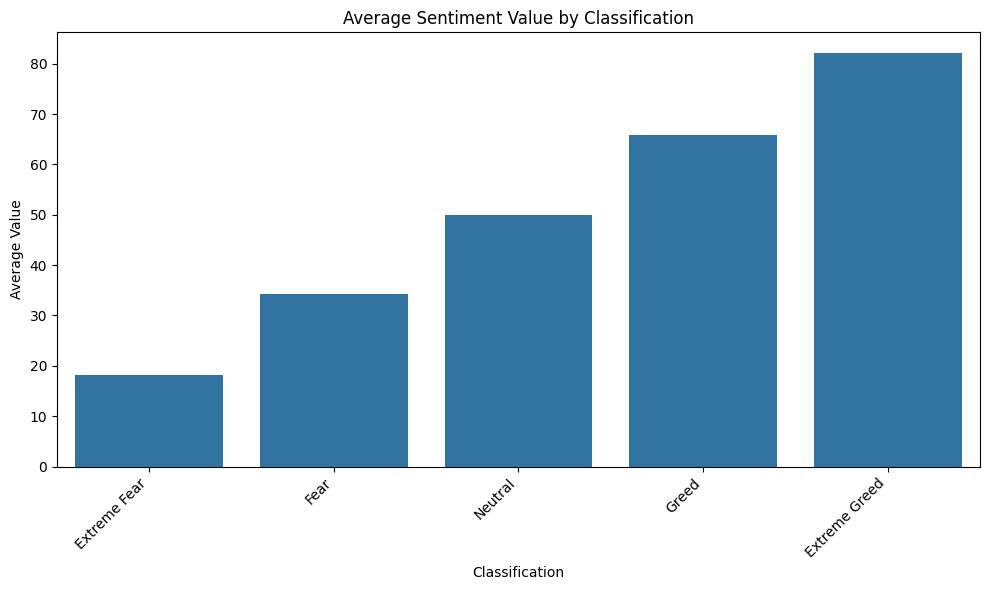

In [12]:
# Calculate the average value by classification for plotting
average_value_by_classification = market_sentiment.groupby('classification')['value'].mean().sort_values()

# Plot the average value by classification
plt.figure(figsize=(10, 6))
sns.barplot(x=average_value_by_classification.index, y=average_value_by_classification.values)
plt.title('Average Sentiment Value by Classification')
plt.xlabel('Classification')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/average_sentiment_by_classification.png')
plt.show()

### Trader Data Analysis

Analyzing the `trader_data` dataset.

In [13]:
# Calculate and display descriptive statistics for relevant columns in trader_data
relevant_columns = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL']
print("Descriptive Statistics for Trader Data (Relevant Columns):")
display(trader_data[relevant_columns].describe())

Descriptive Statistics for Trader Data (Relevant Columns):


,Execution Price,Size Tokens,Size USD,Closed PnL
count,211224.000000,2.112240e+05,2.112240e+05,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,48.749001
std,29447.654868,1.042729e+05,3.657514e+04,919.164828
min,0.000005,8.740000e-07,0.000000e+00,-117990.104100
25%,4.854700,2.940000e+00,1.937900e+02,0.000000
50%,18.280000,3.200000e+01,5.970450e+02,0.000000
75%,101.580000,1.879025e+02,2.058960e+03,5.792797
max,109004.000000,1.582244e+07,3.921431e+06,135329.090100


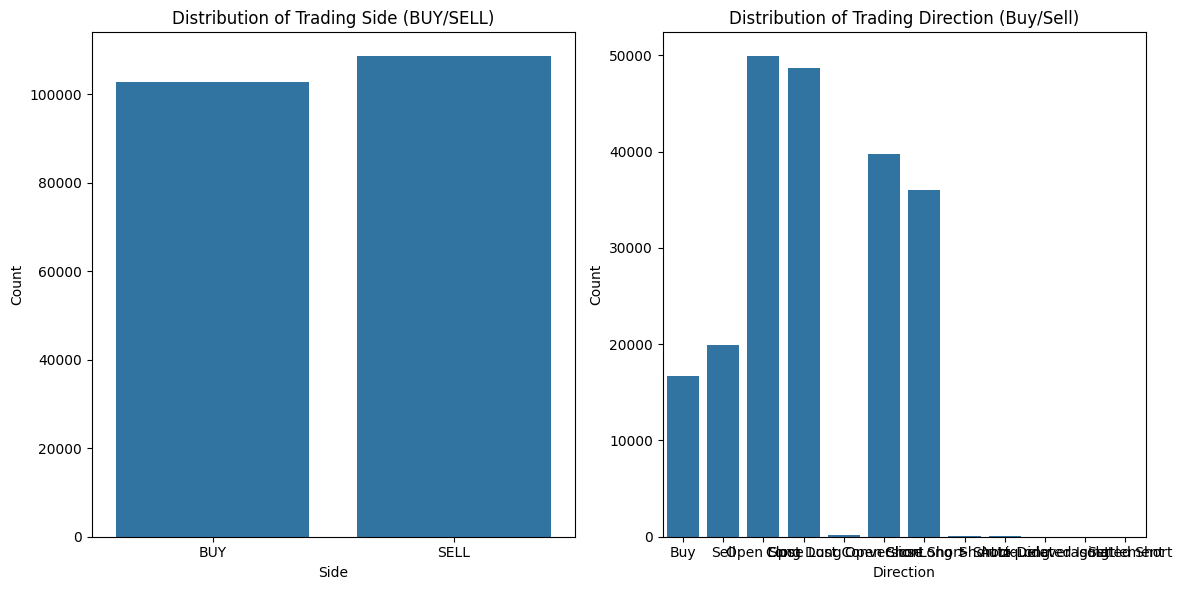

In [14]:
# Analyze the distribution of trading 'Side' and 'Direction'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=trader_data, x='Side')
plt.title('Distribution of Trading Side (BUY/SELL)')
plt.xlabel('Side')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=trader_data, x='Direction')
plt.title('Distribution of Trading Direction (Buy/Sell)')
plt.xlabel('Direction')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('outputs/trading_side_direction_distribution.png')
plt.show()

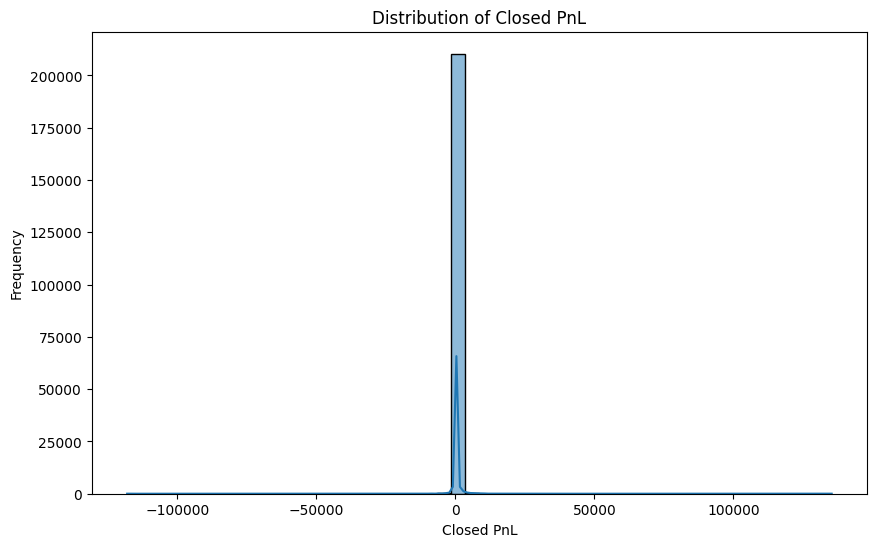

In [15]:
# Explore the distribution of 'Closed PnL'
plt.figure(figsize=(10, 6))
sns.histplot(data=trader_data, x='Closed PnL', bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.savefig('outputs/closed_pnl_distribution.png')
plt.show()

In [16]:
# Aggregate data by 'Account'
account_summary = trader_data.groupby('Account').agg(
    total_size_usd=('Size USD', 'sum'),
    average_closed_pnl=('Closed PnL', 'mean'),
    number_of_trades=('Transaction Hash', 'count')
).reset_index()

# Display top accounts by total Size USD
print("Top 10 Accounts by Total Size USD:")
display(account_summary.sort_values(by='total_size_usd', ascending=False).head(10))

# Display top accounts by average Closed PnL (excluding accounts with very few trades to avoid skewed averages)
# Let's consider accounts with at least 10 trades
profitable_accounts = account_summary[account_summary['number_of_trades'] >= 10]
print("\nTop 10 Accounts by Average Closed PnL (with at least 10 trades):")
display(profitable_accounts.sort_values(by='average_closed_pnl', ascending=False).head(10))

Top 10 Accounts by Total Size USD:


,Account,total_size_usd,average_closed_pnl,number_of_trades
13,0x513b8629fe877bb581bf244e326a047b249c4ff1,4.208766e+08,68.684419,12236
12,0x4f93fead39b70a1824f981a54d4e55b278e9f760,1.296725e+08,40.740489,7584
28,0xb899e522b5715391ae1d4f137653e7906c5e2115,1.088770e+08,4.648305,4838
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,7.410781e+07,20.806305,40184
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,6.803634e+07,44.364091,21192
0,0x083384f897ee0f19899168e3b1bec365f52a9012,6.169726e+07,419.127768,3818
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,5.654357e+07,145.481748,14733
11,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,3.957295e+07,155.589314,4356
2,0x271b280974205ca63b716753467d5a371de622ab,3.387344e+07,-18.492043,3809
17,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,2.572950e+07,38.319560,9893



Top 10 Accounts by Average Closed PnL (with at least 10 trades):


,Account,total_size_usd,average_closed_pnl,number_of_trades
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,1987527.61,520.902331,383
0,0x083384f897ee0f19899168e3b1bec365f52a9012,61697263.97,419.127768,3818
9,0x430f09841d65beb3f27765503d0f850b8bce7713,2966109.22,336.735548,1237
16,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,3051144.33,281.826227,1430
15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,11474500.92,270.034947,1590
24,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,861809.40,174.691809,417
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,1143896.46,161.133275,332
11,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,39572949.25,155.589314,4356
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,56543565.23,145.481748,14733
25,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,1677425.72,120.507317,563


In [17]:
# Aggregate data by 'Coin'
coin_summary = trader_data.groupby('Coin').agg(
    total_size_usd=('Size USD', 'sum'),
    average_closed_pnl=('Closed PnL', 'mean'),
    number_of_trades=('Transaction Hash', 'count')
).reset_index()

# Display top coins by total Size USD
print("\nTop 10 Coins by Total Size USD:")
display(coin_summary.sort_values(by='total_size_usd', ascending=False).head(10))

# Display top coins by average Closed PnL (excluding coins with very few trades)
# Let's consider coins with at least 10 trades
profitable_coins = coin_summary[coin_summary['number_of_trades'] >= 10]
print("\nTop 10 Coins by Average Closed PnL (with at least 10 trades):")
display(profitable_coins.sort_values(by='average_closed_pnl', ascending=False).head(10))



Top 10 Coins by Total Size USD:


,Coin,total_size_usd,average_closed_pnl,number_of_trades
105,BTC,6.442321e+08,33.304356,26064
137,HYPE,1.419902e+08,28.652079,68005
205,SOL,1.250748e+08,153.358519,10691
120,ETH,1.182810e+08,118.298874,11158
4,@107,5.576086e+07,92.821850,29992
122,FARTCOIN,8.311390e+06,-21.653164,4650
210,SUI,7.781168e+06,100.691680,1979
217,TRUMP,7.349347e+06,-190.012973,1920
161,MELANIA,7.040710e+06,88.155165,4428
233,XRP,5.343211e+06,2.117757,1774



Top 10 Coins by Average Closed PnL (with at least 10 trades):


,Coin,total_size_usd,average_closed_pnl,number_of_trades
5,@109,5.670660e+03,270.704207,20
92,AVAX,4.001155e+05,239.095613,202
117,ENA,1.625400e+06,219.524751,990
72,@85,4.903450e+04,200.804091,132
116,EIGEN,4.177815e+05,197.063189,330
112,DOGE,2.452103e+06,178.623676,826
205,SOL,1.250748e+08,153.358519,10691
168,MOODENG,1.619565e+05,151.096714,107
240,ZRO,1.213825e+06,148.327509,1239
121,ETHFI,7.697161e+05,141.250823,311


In [18]:
# Analyze trading activity over time
trader_data['date'] = trader_data['Timestamp IST'].dt.date

daily_activity = trader_data.groupby('date').agg(
    total_size_usd=('Size USD', 'sum'),
    number_of_trades=('Transaction Hash', 'count')
).reset_index()

daily_activity['date'] = pd.to_datetime(daily_activity['date'])

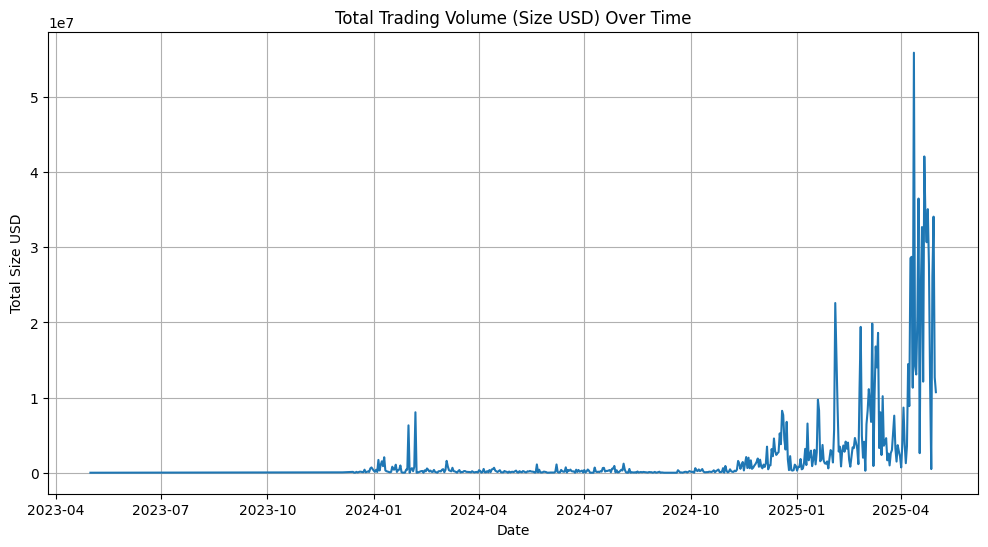

In [19]:
# Visualize total trading volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='date', y='total_size_usd')
plt.title('Total Trading Volume (Size USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Size USD')
plt.grid(True)
plt.savefig('outputs/total_trading_volume_over_time.png')
plt.show()

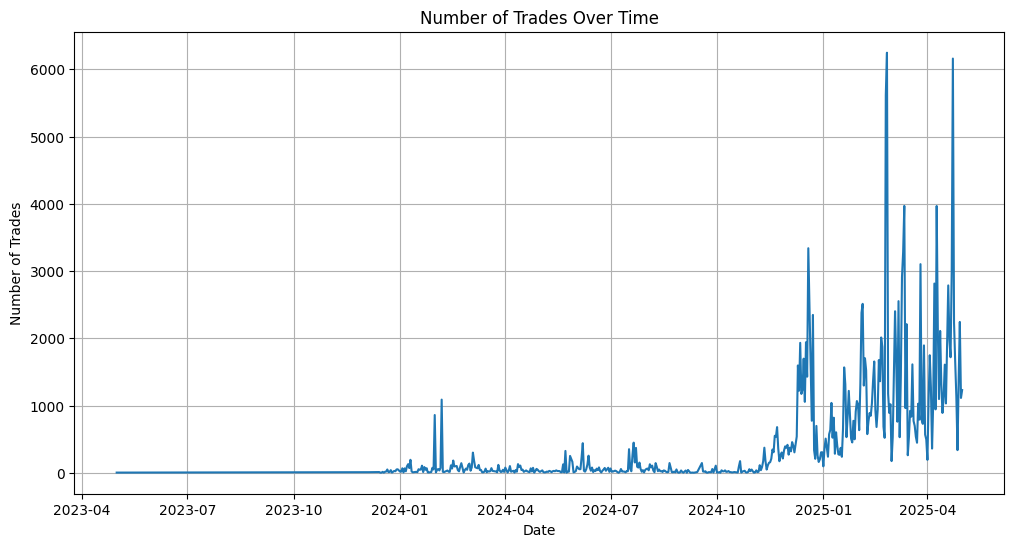

In [20]:
# Visualize number of trades over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='date', y='number_of_trades')
plt.title('Number of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.savefig('outputs/number_of_trades_over_time.png')
plt.show()

## 3. Combined Data Analysis

Combining and correlating market sentiment and trader data.

In [21]:
# Merge the daily_activity DataFrame with the market_sentiment DataFrame on the 'date' column
combined_data = pd.merge(daily_activity, market_sentiment, on='date', how='inner')

display(combined_data.head())
combined_data.info()

,date,total_size_usd,number_of_trades,timestamp,value,classification
0,2023-05-01,477.00,3,1682919000,63,Greed
1,2023-12-05,50005.83,9,1701754200,75,Extreme Greed
2,2023-12-14,113203.35,11,1702531800,72,Greed
3,2023-12-15,10609.95,2,1702618200,70,Greed
4,2023-12-16,15348.77,3,1702704600,67,Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              479 non-null    datetime64[ns]
 1   total_size_usd    479 non-null    float64       
 2   number_of_trades  479 non-null    int64         
 3   timestamp         479 non-null    int64         
 4   value             479 non-null    int64         
 5   classification    479 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 22.6+ KB


In [22]:
# Calculate the correlation matrix
correlation_matrix = combined_data[['value', 'total_size_usd', 'number_of_trades']].corr()
display("Correlation Matrix between Sentiment Value, Total Size USD, and Number of Trades:")
display(correlation_matrix)

'Correlation Matrix between Sentiment Value, Total Size USD, and Number of Trades:'

,value,total_size_usd,number_of_trades
value,1.000000,-0.264371,-0.245241
total_size_usd,-0.264371,1.000000,0.720137
number_of_trades,-0.245241,0.720137,1.000000


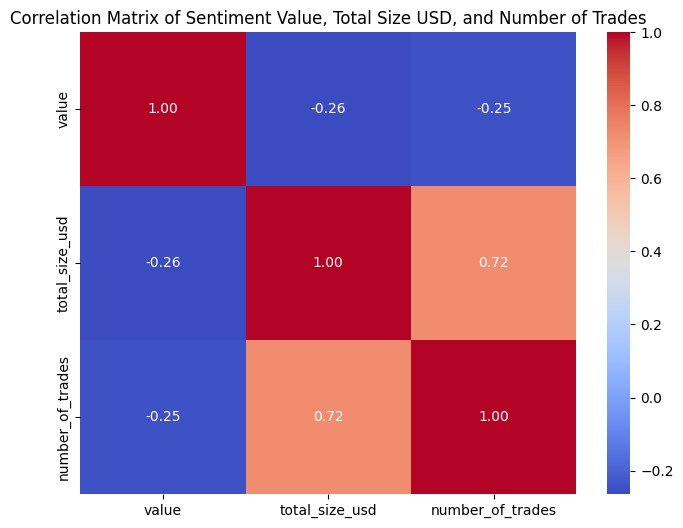

In [23]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sentiment Value, Total Size USD, and Number of Trades')
plt.savefig('outputs/correlation_heatmap.png')
plt.show()

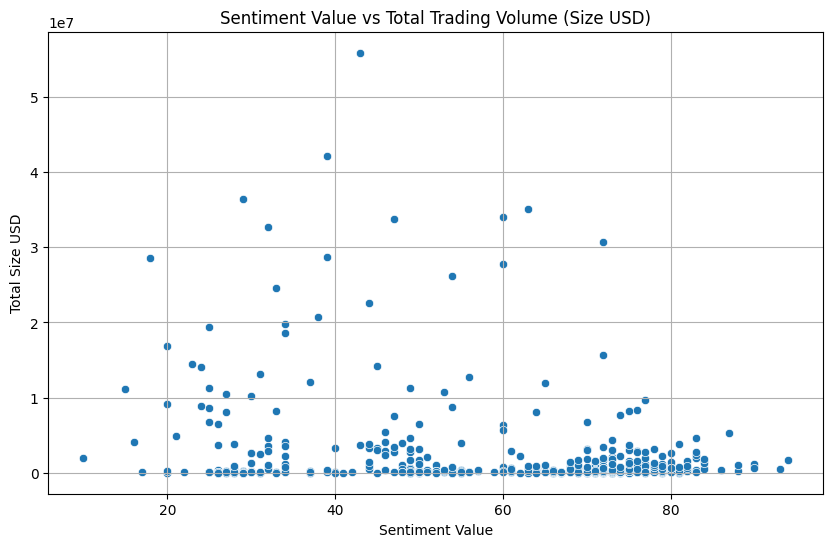

In [24]:
# Visualize the relationship between Sentiment Value and Total Size USD
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='value', y='total_size_usd')
plt.title('Sentiment Value vs Total Trading Volume (Size USD)')
plt.xlabel('Sentiment Value')
plt.ylabel('Total Size USD')
plt.grid(True)
plt.savefig('outputs/sentiment_vs_volume_scatterplot.png')
plt.show()


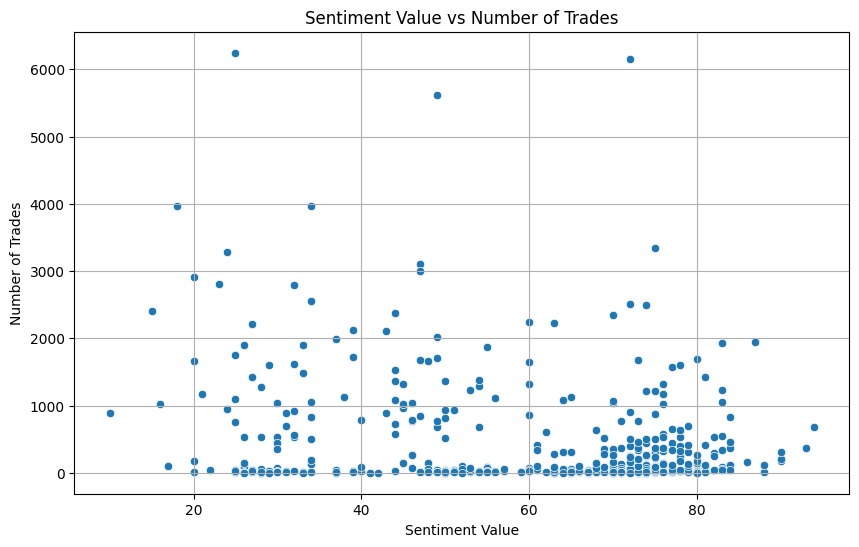

In [25]:
# Visualize the relationship between Sentiment Value and Number of Trades
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='value', y='number_of_trades')
plt.title('Sentiment Value vs Number of Trades')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.savefig('outputs/sentiment_vs_trades_scatterplot.png')
plt.show()


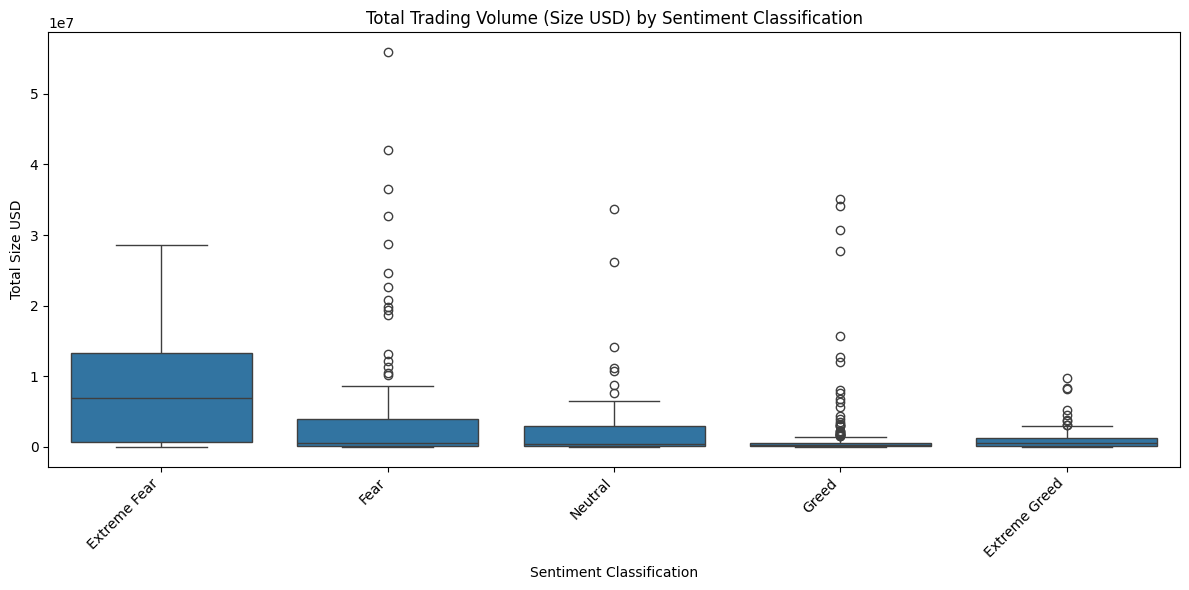

In [26]:
# Explore trading behavior across different sentiment classifications
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='classification', y='total_size_usd', order=average_value_by_classification.index)
plt.title('Total Trading Volume (Size USD) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Total Size USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/volume_by_sentiment_boxplot.png')
plt.show()


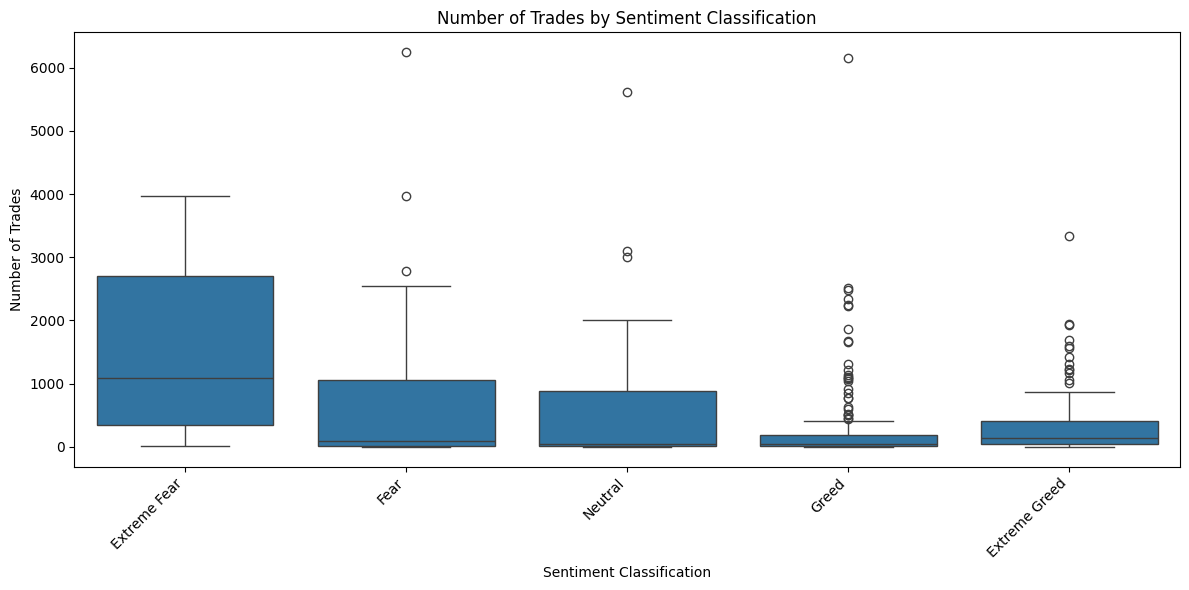

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='classification', y='number_of_trades', order=average_value_by_classification.index)
plt.title('Number of Trades by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/trades_by_sentiment_boxplot.png')
plt.show()